In [2]:
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def jaccard(first, second):
    return len(set(first).intersection(second)) / len(set(first).union(second))

In [16]:
data_dict = pd.read_csv('D:/project/PY017_table_02.csv', header=None, index_col=0, squeeze=True).to_dict()
gene = list(data_dict.values())[1::]
name = list(data_dict.keys())[1::]


In [15]:
coef = []
name_node = []
for x in range(0,len(name[:5000])):
    loc =[]
    for y in range(0,len(name[:5000])):
        if jaccard(gene[x], gene[y]) >= 0.8 and jaccard(gene[x], gene[y]) < 1:
            loc.append(y)
    coef.append(loc)
    name_node.append(name[x])
    

In [14]:

df = pd.DataFrame(list(range(0, len(coef))), columns=['name'])
df['coef'] = coef
df

df['name'] = df['name'].astype('object')
df['coef'] = df['coef'].astype('object')

new_df = df[df.coef.apply(lambda c: c!=[])]
names = ['name']
idx = pd.MultiIndex.from_tuples(df[names].values.tolist(), names=names)
xx = pd.DataFrame(df.coef.tolist(), idx).stack().reset_index(names, name='coef')

G = nx.convert_matrix.from_pandas_edgelist(xx, source= 'name' , target='coef')
G.name = 'My Networking'
print(nx.info(G))



Name: My Networking
Type: Graph
Number of nodes: 847
Number of edges: 4222
Average degree:   9.9693


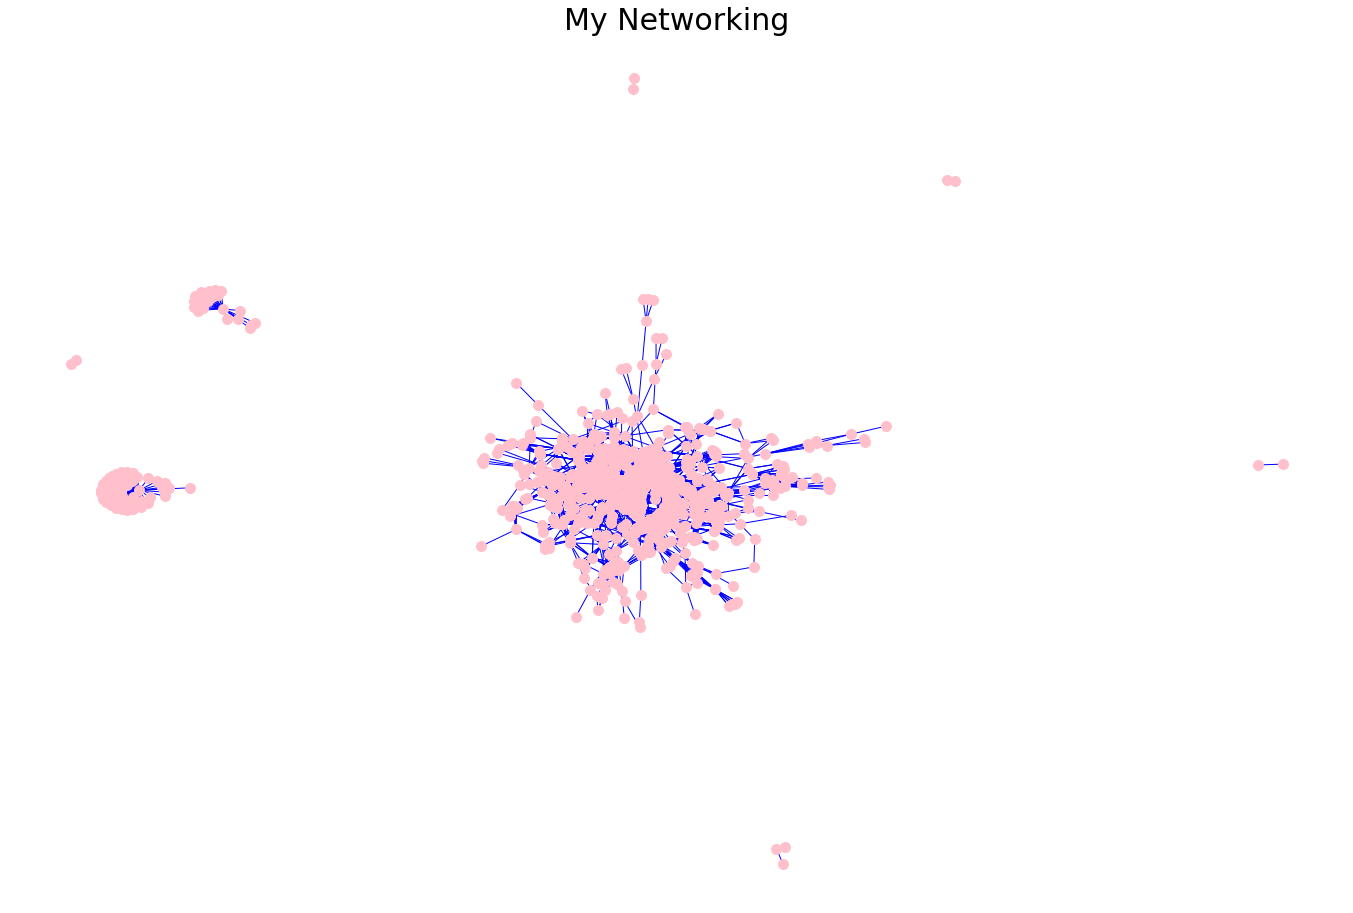

In [7]:
plt.figure(figsize=(24,16))
my_var2 = nx.draw_networkx(G, 
                 nx.spring_layout(G), 
                 with_labels=False, 
                 font_weight='normal', 
                 node_size=100,
                 arrows=True,
                 node_color='pink',
                 font_color='blue',
                 edge_color='blue')
plt.title(G.name, size=30)
plt.axis('off')
plt.show()

In [8]:
def graph_drawing(graph_database, position, algorithm, algorithm_name):
    plt.figure(figsize=(24,16))
    nx.draw_networkx(graph_database, 
                     position, 
                     node_size=100, 
                     with_labels=False,
                     font_weight='normal',
                     cmap=plt.get_cmap('cool'), 
                     arrows=True,
                     edge_color='gray',
                     node_color=list(algorithm.values()),
                     nodelist=list(algorithm.keys()))
    plt.title(algorithm_name, size=30)
    plt.axis('off')
    plt.show()

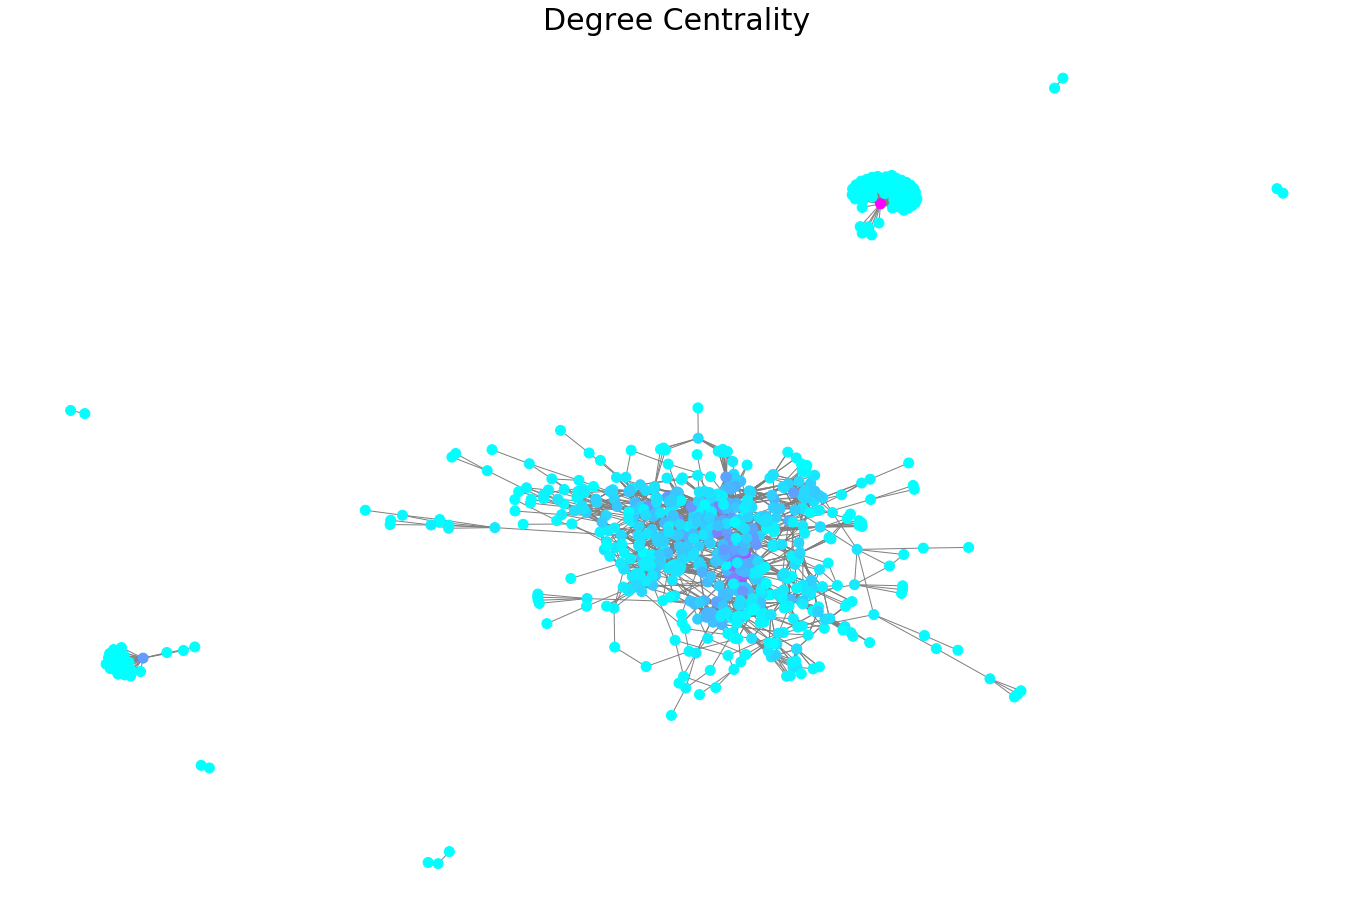

In [9]:
my_var1 = graph_drawing(G, nx.spring_layout(G), nx.degree_centrality(G), 'Degree Centrality')

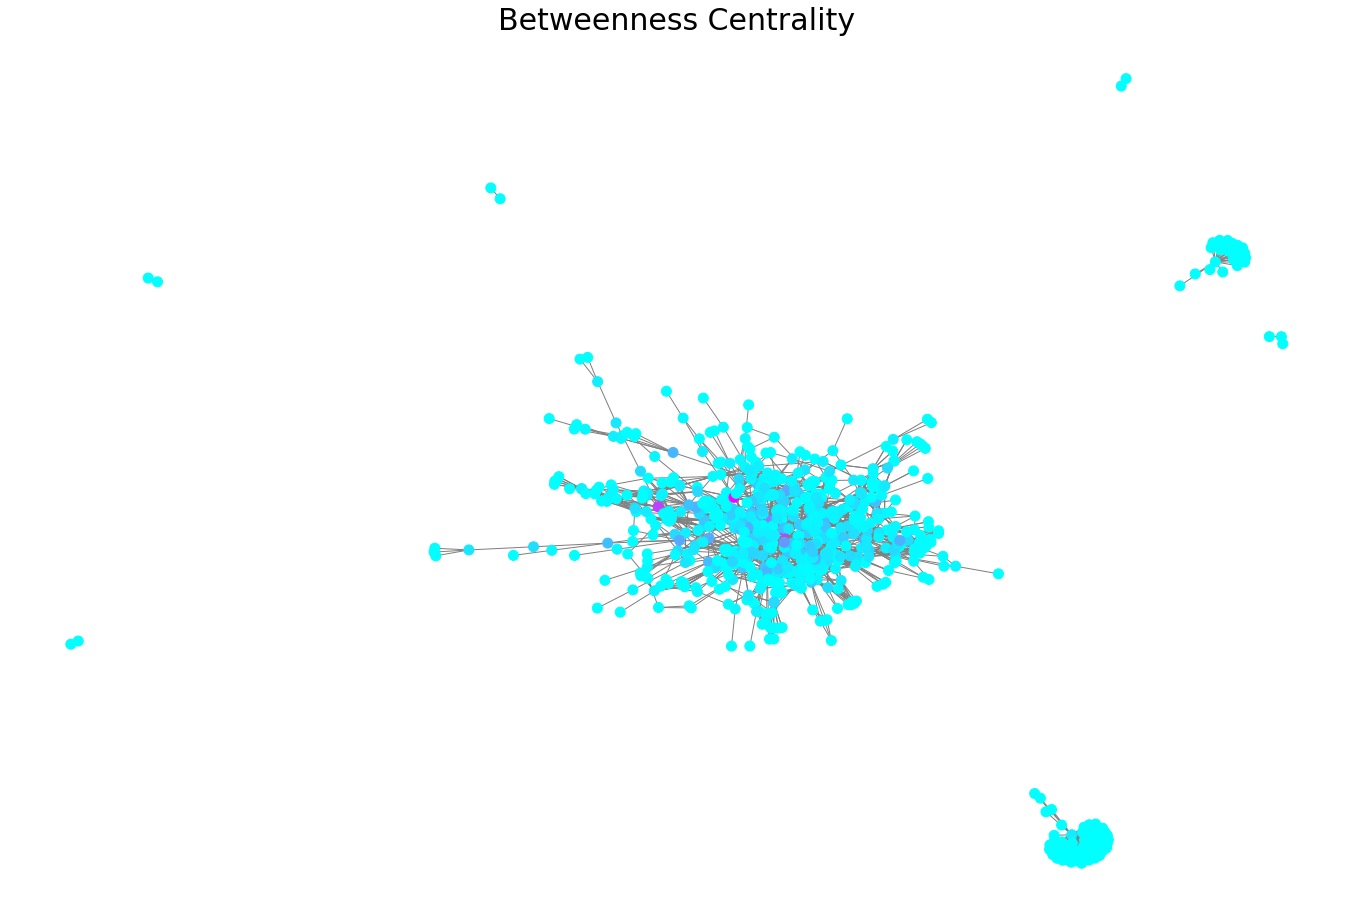

In [10]:
graph_drawing(G, nx.spring_layout(G), nx.betweenness_centrality(G), 'Betweenness Centrality')

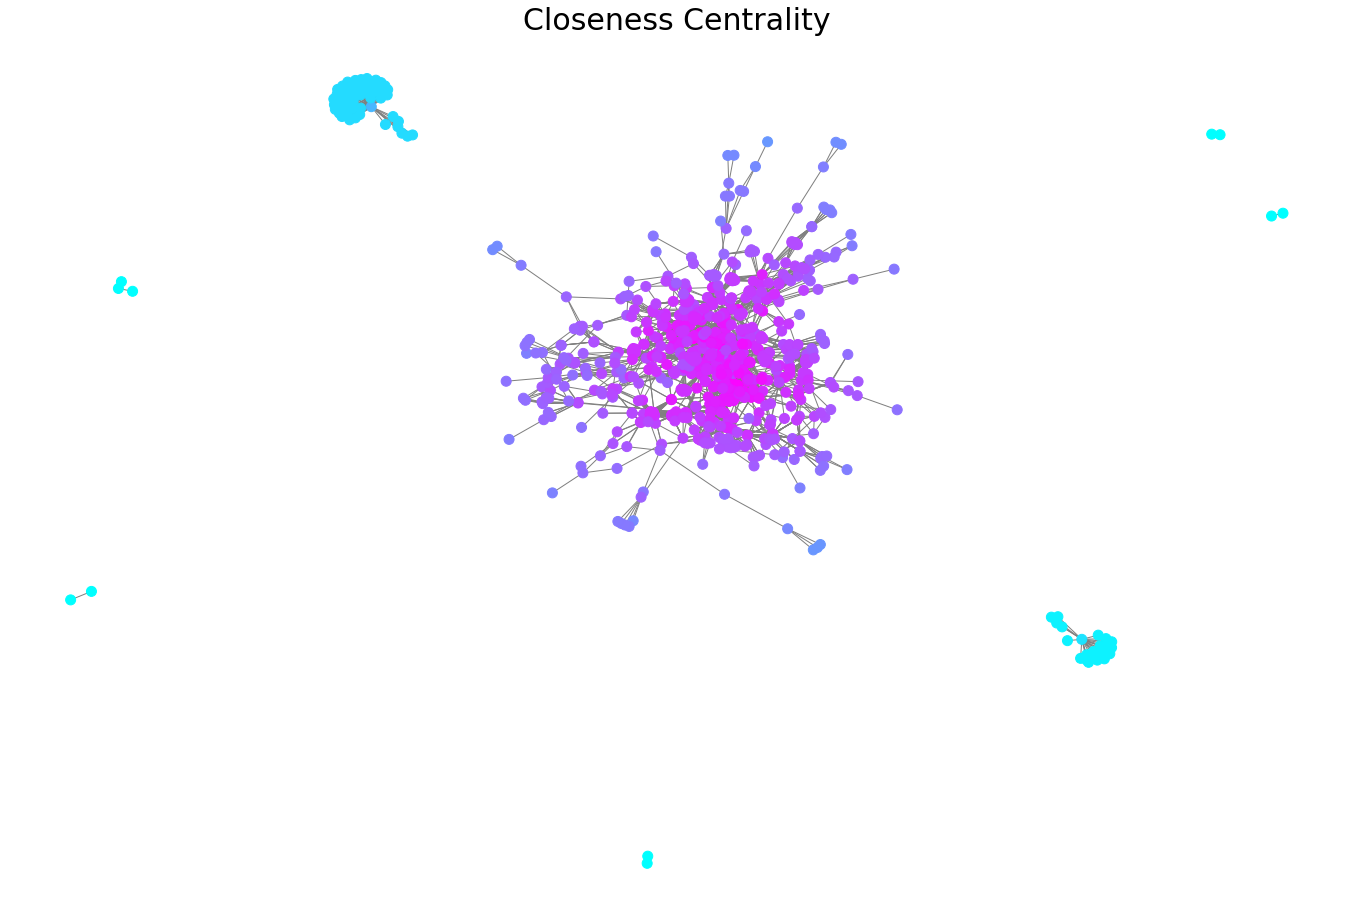

In [11]:
graph_drawing(G, nx.spring_layout(G), nx.closeness_centrality(G), 'Closeness Centrality')

In [12]:
from pyvis.network import Network


In [13]:
got_net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

# set the physics layout of the network
got_net.barnes_hut()

sources = xx['name'].astype(str)
targets = xx['coef'].astype(str)


edge_data = zip(sources, targets)

for e in edge_data:
    src = e[0]
    dst = e[1]


    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=1)

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])

got_net.show("my_network.html")
